# Aquecimento global no século 21

(MELHORAR DEPOIS)

O aquecimento global é provavelmente o maior desafio que a humanidade já teve que enfrentar. Sub-produto da busca humana por desenvolvimento, ele ameaça todas as formas de vida presentes no planeta.
Desde o advento da Revolução Industrial em 1760, pesquisadores já desconfiavam que o CO2 emitido pelas cada vez mais numerosas máquinas a carvão iria aquecer o planeta em alguns séculos (FONTE). Agora, um estudo realizado em 2020 revela que até um terço de toda fauna e flora global podem ser extintas até 2070.

Tendo isso em mente, neste notebook iremos tentar analisar o que as diferentes potências do mundo estão fazendo para tentar evitar, ou pelo menos desacelerar, o aquecimento global. Veremos também as alternativas possíveis para os combustíveis fósseis, principais contribuintes para a emissão anual de gases de efeito estufa, junto com uma análise socioeconômica que revelará o que cada país consegue fazer.

ALEMANHA X FRANÇA X JAPAO!!!: ENERGIA NUCLEAR

POPULAÇAO DOS PAISES X ENERGIA TOTAL CONSUMIDA

QUAIS ENERGIA RENOVAVEIS SAO AS MAIS USADAS

In [1]:
# imports padrões
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as pld
import pandas as pd
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
c:\Users\Leonardo\miniconda3\envs\env\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


### Introdução à metodologia

Vamos primeiro demonstrar como usaremos os dados obtidos.

Antes de tudo, precisamos definir que países vão ser analisados. Não queremos analisar todos, já que a visualização dos dados seria comprometida.

Observe que não colocaremos todos os países considerados como potências econômicas. Contudo, os países da lista a seguir já nos darão uma boa ideia do cenário atual.

In [2]:
potencias = ["United States", "United Kingdom", "France", "Germany", "China", "India", "Brazil"]

Perceba que também colocamos o Brasil na lista, para nos compararmos com os outros.

O resto do notebook se baseará nesta lista; Caso queira ver algum conjunto de países diferente basta mudá-la e rodar o o notebook de novo.

Agora, vamos mostrar um exemplo de como faremos um gráfico com os dados que temos.

Como exemplo, vamos ver a população de cada um dos países da lista no período 1990-1999.

In [3]:
# Primeiro, vamos mostrar como iterar sobre as listas e colunas

data = pd.read_csv("./data./World Energy Consumption.csv")
for index,row in data.iterrows():
    if row.country in potencias and row.year == 1999:
        print(row.population)

172319008.0
1281515008.0
58704000.0
81390000.0
1038057984.0
58716000.0
278548000.0


Caso mude a lista de potências, verifique se o número de output corresponde ao número de países listados, para verificar que digitou corretamente.

Agora que conseguimos esses dados, vamos montar o gráfico que cobre o período de 1990-1999.

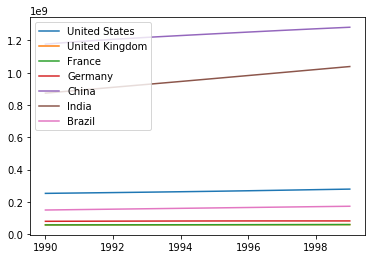

In [4]:
# Criando o dicionário que vai segurar os dados de cada país
dict_resultado = {}

# Primeiro vamos popular o dicionário com as keys dos países desejados
for country in potencias:
    dict_resultado[country] = []

# Colocando os dados no dicionário
for index, row in data.iterrows():
    # print(row.country)
    if row.country in potencias and row.year in range(1990, 2000): # Explicado em baixo
        dict_resultado[row.country].append(row.population)

# Fazendo o gráfico com o dicionário

for country, population in dict_resultado.items():
    plt.plot(range(1990, 2000), population, label=country)
    plt.legend(loc="upper left")

OBS: Quando vamos botar os dados nas listas, não nos preocupamos com organizá-los cronologicamente. A princípio, isso seria uma prática ruim, visto que seria muito fácil ficarmos com dados na seguinte estrutura:

`[(dados de 2000), (dados de 2002), (dados de 2005), (dados de 2001), (dados de 2003)]`

Contudo, esse csv foi organizado previamente de forma cronológica, então não precisamos nos preocupar com isso, visto que o nosso loop vê as linhas de cima para baixo, da mesma forma que elas foram organizadas. Dessa forma, podemos usar o método com range(), que nos permite iterar sobre o csv de forma mais rápida.

Observe que a maioria dos países da lista se mantiveram no mesmo nível. Os 2 únicos com crescimento perceptível são a China e a Índia.

Agora que demonstramos o worflow geral que será feito para analisar os dados, estamos prontos para começar o estudo.

## O cenário atual

Analisaremos o quanto os países atualmente dependem de fontes fósseis.

De início, olharemos para a quantidade, em terawatt-horas, de energia gerada por cada país proveniente de combustíveis fósseis: carvão, petróleo e gás.

In [36]:
data = pd.read_csv("./data./World Energy Consumption.csv")

# Criando o dicionário
dict_co2_depend = {}
for pais in potencias:
    dict_co2_depend[pais] = []


# Populando o dicionário
ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.fossil_electricity == int) or type(row.fossil_electricity == float):
                dict_co2_depend[row.country].append(row.fossil_electricity)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                dict_co2_depend[row.country].append(np.average(dict_co2_depend[row.country]))
        

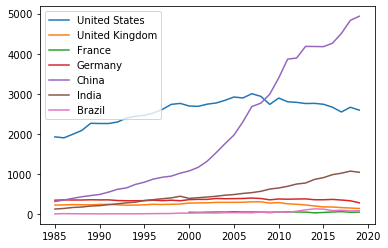

In [37]:
# Agora que temos os dados, vamos fazer um gráfico com eles
for pais, uso in dict_co2_depend.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Com o gráfico acima, podemos ver que, dos países selecionados, a China e os EUA são de longe os que mais dependem de combustíveis fósseis. Podemos ver também que a Índia tem a segunda maior taxa de crescimento.

Ao olhar para esse gráfico, podemos rapidamente chegar na conclusão que, para parar o aquecimento global, esses dois ou três países devem parar de consumir tanto combustível fóssil imediatamente. Contudo, devemos ter em mente que as potências globais que atualmente não dependem tanto de energia fóssil fizeram amplo uso do carvão no início da Revolução Industrial.

Agora, veremos o esforço que cada um destes países está fazendo para adotar fontes renováveis de energia. Para isso, veremos a quantidade de energia gerada a partir destas fontes, em terawatt-horas, no mesmo período de tempo.

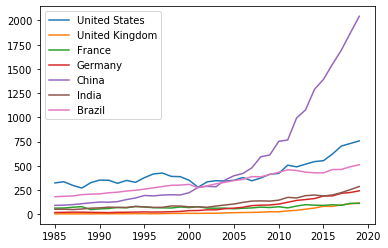

In [38]:
# Criando o dicionário
renew_energy = {}
for pais in potencias:
    renew_energy[pais] = []


# Populando o dicionário
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.renewables_electricity == int) or type(row.renewables_electricity == float):
                renew_energy[row.country].append(row.renewables_electricity)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                renew_energy[row.country].append(np.average(renew_energy[row.country]))

# Fazendo o gráfico
for pais, uso in renew_energy.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Então, aparentemente, a China não só é a que mais depende de fóssil, mas de renováveis também. Isso nos leva à conclusão de que a China simplesmente usa mais energia que o resto do mundo.

Agora percebemos um fator importante neste estudo: devemos sempre olhar para esses dados com relação à população do país. Assim, um país que precisa gerar energia suficiente para sustentar 1 bilhão de pessoas é comparado de forma justa com outro com apenas 50 milhões.

Tendo isso em mente, vamos rapidamente refazer os dois últimos gráficos.

In [39]:
# Primeiro, o da dependência de fósseis
dict_co2_per_capita = {}
for pais in potencias:
    dict_co2_per_capita[pais] = []

ano_inicial = 1980
ano_final = 2020
for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.fossil_energy_per_capita == int) or type(row.fossil_energy_per_capita == float):
                dict_co2_per_capita[row.country].append(row.fossil_energy_per_capita)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                dict_co2_per_capita[row.country].append(np.average(dict_co2_per_capita[row.country]))


# Agora, o das energias renováveis
renew_energy_per_capita = {}
for pais in potencias:
    renew_energy_per_capita[pais] = []

for index,row in data.iterrows():
    if row.country in potencias:
        if row.year in range(ano_inicial, ano_final): # OBS: Isso é seguro de se fazer nesse csv, pois os dados estão organizados cronologicamente. (Explicado na seção Tratamento de Dados)
            if type(row.renewables_elec_per_capita == int) or type(row.renewables_elec_per_capita == float):
                renew_energy_per_capita[row.country].append(row.renewables_elec_per_capita)
            else: # Se não tem dados sobre esse ano, então colocamos a média do país até então
                renew_energy_per_capita[row.country].append(np.average(renew_energy_per_capita[row.country]))

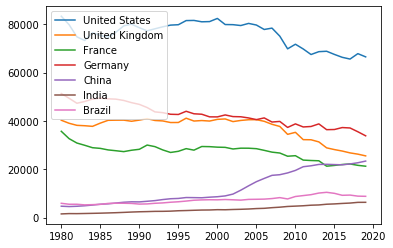

In [40]:
for pais, uso in dict_co2_per_capita.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

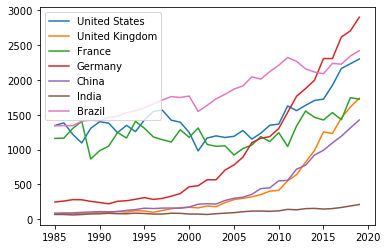

In [41]:
for pais, uso in renew_energy_per_capita.items():
    plt.plot(range(ano_inicial, ano_final), uso, label = pais)
    plt.legend(loc="upper left")

Com esses dois gráficos temos uma visão mais realista dos dados. 

No gráfico de dependência fóssil, a China, que antes dominava o uso de CO2, agora é apenas a quarta que mais consume, quase empatada com a França. Podemos ver também que os países desenvolvidos da lista ainda usam bastante CO2, mas estão em um declínio estável.

Já no gráfico de energias renováveis, vemos que os países desenvolvidos são os que mais procuram adotar as fontes renováveis. A Alemanha por exemplo, tem uma curva quase exponencial. A China também vem demonstrando esforços para se modernizar. Dos países listados, somente a Índia parece ignorar as energias limpas.